In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
import scipy as sc
import os
from sklearn.decomposition import PCA
import glob
import pathlib as pl

In [93]:
import salishsea_tools.geo_tools as gt

In [3]:
files = glob.glob('/results/forcing/atmospheric/GEM2.5/gemlam/gemlam_y2007m02d??.nc')
len(files)

28

In [2]:
##data must be converted into a 2D matrix for pca analysis

def transform(arr):
    data3 = np.empty((266*256, arr.shape[0])) 
    for i in range(arr.shape[0]):
        flattened_arr = arr[i, 0:266, 0:256].flatten(order = 'C')
        data3[:, i] = flattened_arr[:]; 
    return data3

def reverse(arr):
    data4 = np.empty((arr.shape[1], 266, 256))
    for i in range(arr.shape[1]):
        temp = arr[:,i].reshape(266,256)
        data4[i,:,:] = temp
    return data4

In [19]:
files = glob.glob('/results/forcing/atmospheric/GEM2.5/gemlam/gemlam_y2007m02d??.nc')
u_data = np.empty( (24 * len(files), 266, 256) )
v_data = np.empty( (24 * len(files), 266, 256) )

for i in range(len(files)):
    dayX = xr.open_dataset(files[i])
    
    dayX_u = np.array( dayX['u_wind'][0:24, 0:266, 0:256] )
    dayX_v = np.array( dayX['v_wind'][0:24, 0:266, 0:256] )
    
    u_data[24*i:24*i + 24, : , : ] = dayX_u[0:24, 0:266, 0:256]
    v_data[24*i:24*i + 24, : , : ] = dayX_v[0:24, 0:266, 0:256]
    
u_mat = transform(u_data)
v_mat = transform(v_data)
c_mat = np.concatenate((u_mat,v_mat), axis=0)
c_mat.shape

(136192, 672)

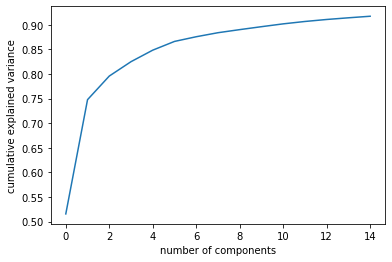

In [10]:
pcaG = PCA(n_components = 15)
PCsG = pcaG.fit_transform(c_mat)
plt.plot(np.cumsum(pcaG.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


In [20]:
pca = PCA(n_components = 10)
PCs = pca.fit_transform(c_mat)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

new_mat = pca.inverse_transform(pca.transform(c_mat))
new_u = reverse(new_mat[0:266*256,:])
new_v = reverse(new_mat[266*256:2*266*256,:])

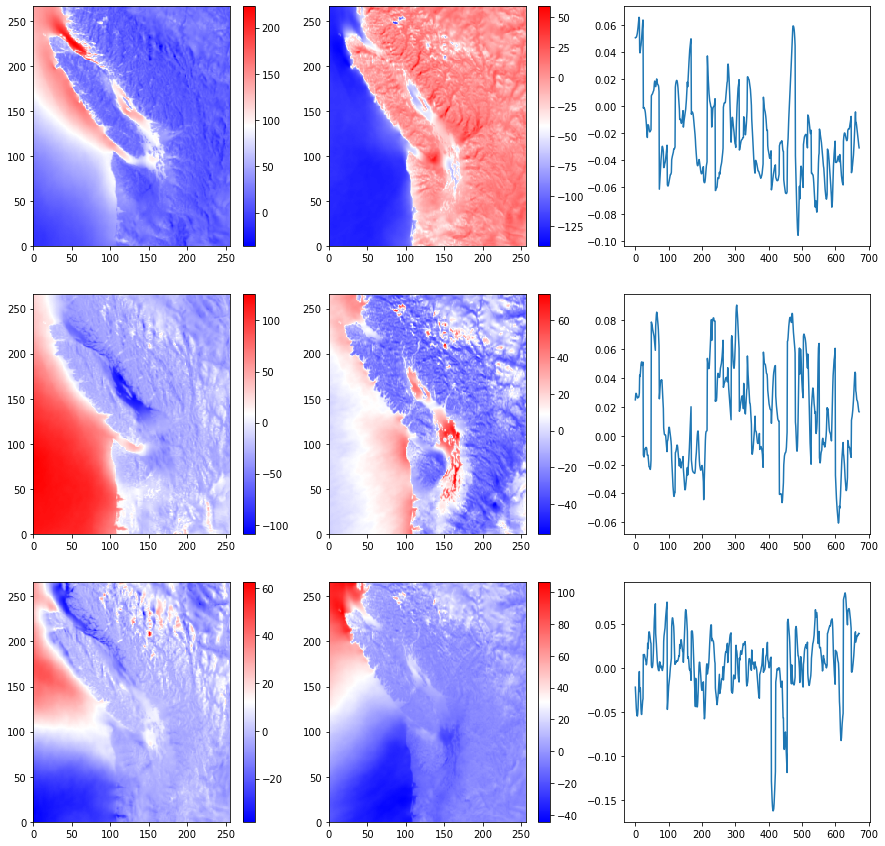

In [79]:
#displaying first 3 principle conponents (showing u_winds) and time-loading
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
mode0_u = PCs[:256*266, 0].reshape(266,256)
mode1_u = PCs[:256*266, 1].reshape(266,256)
mode2_u = PCs[:256*266, 2].reshape(266,256)
mode0_v = PCs[256*266:, 0].reshape(266,256)
mode1_v = PCs[256*266:, 1].reshape(266,256)
mode2_v = PCs[256*266:, 2].reshape(266,256)
colors = ax[0, 0].pcolormesh(mode0_u, cmap = 'bwr')
fig.colorbar(colors, ax = ax[0,0])
colors = ax[0, 1].pcolormesh(mode0_v, cmap = 'bwr')
fig.colorbar(colors, ax = ax[0,1])
ax[0, 2].plot(eigvecs[0])
colors = ax[1, 0].pcolormesh(mode1_u, cmap = 'bwr')
fig.colorbar(colors, ax = ax[1,0])
colors = ax[1, 1].pcolormesh(mode1_v, cmap = 'bwr')
fig.colorbar(colors, ax = ax[1,1])
ax[1, 2].plot(eigvecs[1])
colors = ax[2, 0].pcolormesh(mode2_u, cmap = 'bwr')
fig.colorbar(colors, ax = ax[2,0])
colors = ax[2, 1].pcolormesh(mode2_v, cmap = 'bwr')
fig.colorbar(colors, ax = ax[2,1])
ax[2, 2].plot(eigvecs[2])

## PCA with Daily Averages

In [24]:
## Daily averages matrix

files = glob.glob('/results/forcing/atmospheric/GEM2.5/gemlam/gemlam_y2007m02d??.nc')
u_data2 = np.empty( (len(files), 266, 256) )
v_data2 = np.empty( (len(files), 266, 256) )

for i in range(len(files)):
    dayX = xr.open_dataset(files[i])
    
    dayX_u = np.array( dayX['u_wind'][0:24, 0:266, 0:256] )
    dayX_v = np.array( dayX['v_wind'][0:24, 0:266, 0:256] )
    avg_u = dayX_u.mean(axis = 0)
    avg_v = dayX_v.mean(axis = 0)
    
    u_data2[i, : , : ] = avg_u[0:266, 0:256]
    v_data2[i, : , : ] = avg_v[0:266, 0:256]
    
u_mat2 = transform(u_data2)
v_mat2 = transform(v_data2)
c_mat2 = np.concatenate((u_mat2,v_mat2), axis=0)

In [27]:
c_mat2.shape

(136192, 28)

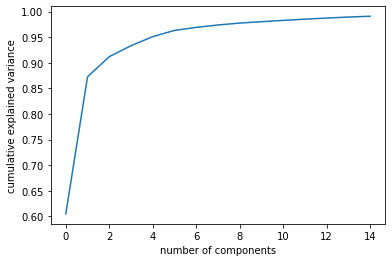

In [31]:
pcaG = PCA(n_components = 15)
PCsG = pcaG.fit_transform(c_mat2)
plt.plot(np.cumsum(pcaG.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [25]:
pca2 = PCA(n_components = 10)
PCs2 = pca2.fit_transform(c_mat2)
eigvecs2 = pca2.components_
fracVar2 = pca2.explained_variance_ratio_

new_mat2 = pca2.inverse_transform(pca2.transform(c_mat2))
new_u2 = reverse(new_mat2[0:266*256,:])
new_v2 = reverse(new_mat2[266*256:2*266*256,:])

In [34]:
print (mode0_u.max())
print (mode0_u.min())
print (mode1_u.max())
print (mode1_u.min())

43.853798940083585
-7.994197010283329


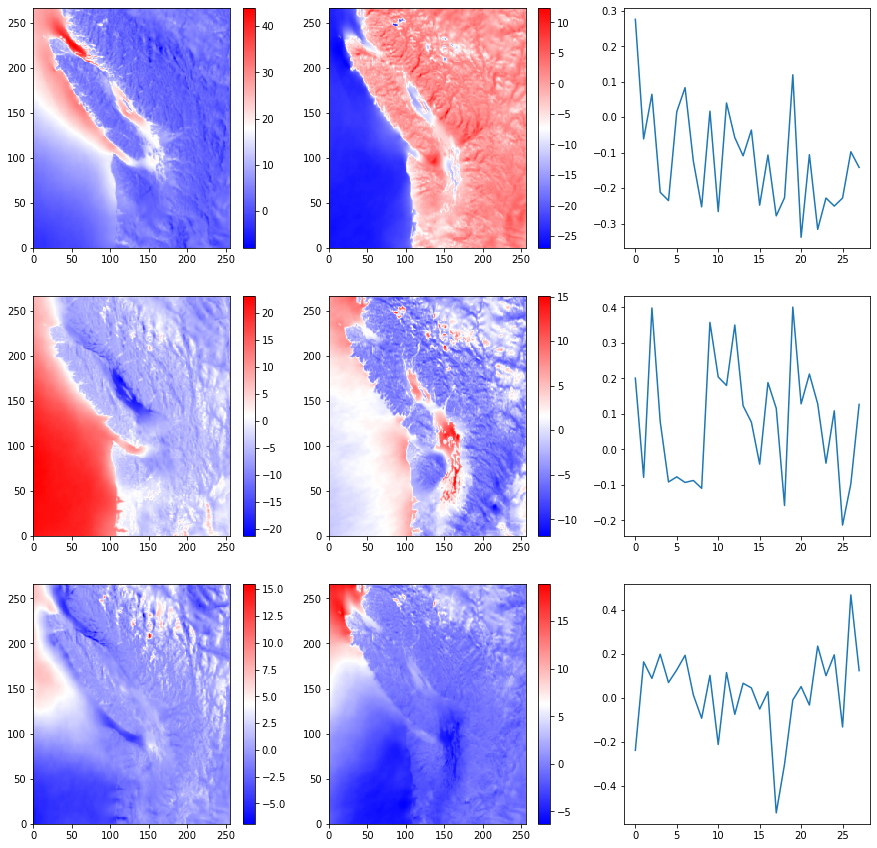

In [80]:
#displaying first 3 principle conponents (showing u_winds) and time-loading
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
mode0_u2 = PCs2[:256*266, 0].reshape(266,256)
mode1_u2 = PCs2[:256*266, 1].reshape(266,256)
mode2_u2 = PCs2[:256*266, 2].reshape(266,256)
mode0_v2 = PCs2[256*266:, 0].reshape(266,256)
mode1_v2 = PCs2[256*266:, 1].reshape(266,256)
mode2_v2 = PCs2[256*266:, 2].reshape(266,256)
colors = ax[0, 0].pcolormesh(mode0_u2, cmap = 'bwr')
fig.colorbar(colors, ax = ax[0,0])
colors = ax[0, 1].pcolormesh(mode0_v2, cmap = 'bwr')
fig.colorbar(colors, ax = ax[0,1])
ax[0, 2].plot(eigvecs2[0])
colors = ax[1, 0].pcolormesh(mode1_u2, cmap = 'bwr')
fig.colorbar(colors, ax = ax[1,0])
colors = ax[1, 1].pcolormesh(mode1_v2, cmap = 'bwr')
fig.colorbar(colors, ax = ax[1,1])
ax[1, 2].plot(eigvecs2[1])
colors = ax[2, 0].pcolormesh(mode2_u2, cmap = 'bwr')
fig.colorbar(colors, ax = ax[2,0])
colors = ax[2, 1].pcolormesh(mode2_v2, cmap = 'bwr')
fig.colorbar(colors, ax = ax[2,1])
ax[2, 2].plot(eigvecs2[2])

## 3-hour averaged data

In [13]:
## 3-hours averages matrix

files = glob.glob('/results/forcing/atmospheric/GEM2.5/gemlam/gemlam_y2007m02d??.nc')
u_data3 = np.empty( (8*len(files), 266, 256)) 
v_data3 = np.empty( (8*len(files), 266, 256)) 

for i in range(len(files)):
    dayX = xr.open_dataset(files[i])
    for j in range(8):
        u_3 = np.array( dayX['u_wind'][j*3:j*3 + 3, 0:266, 0:256] )
        v_3 = np.array( dayX['v_wind'][0:24, 0:266, 0:256] )
        avg_u = u_3.mean(axis = 0) ##average of 3-hour time interval
        avg_v = v_3.mean(axis = 0)
        u_data3[8*i + j, : , : ] = avg_u[0:266, 0:256] ##adding 3-hour average to new data array
        v_data3[8*i + j, : , : ] = avg_v[0:266, 0:256]
    
u_mat3 = transform(u_data3)
v_mat3 = transform(v_data3)
c_mat3 = np.concatenate((u_mat3,v_mat3), axis=0)

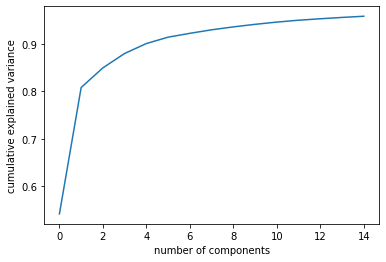

In [15]:
pcaG = PCA(n_components = 15)
PCsG = pcaG.fit_transform(c_mat3)
plt.plot(np.cumsum(pcaG.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [17]:
pca3 = PCA(n_components = 10)
PCs3 = pca3.fit_transform(c_mat3)
eigvecs3 = pca3.components_
fracVar3 = pca3.explained_variance_ratio_

new_mat3 = pca3.inverse_transform(pca3.transform(c_mat3))
new_u3 = reverse(new_mat3[0:266*256,:])
new_v3 = reverse(new_mat3[266*256:2*266*256,:])

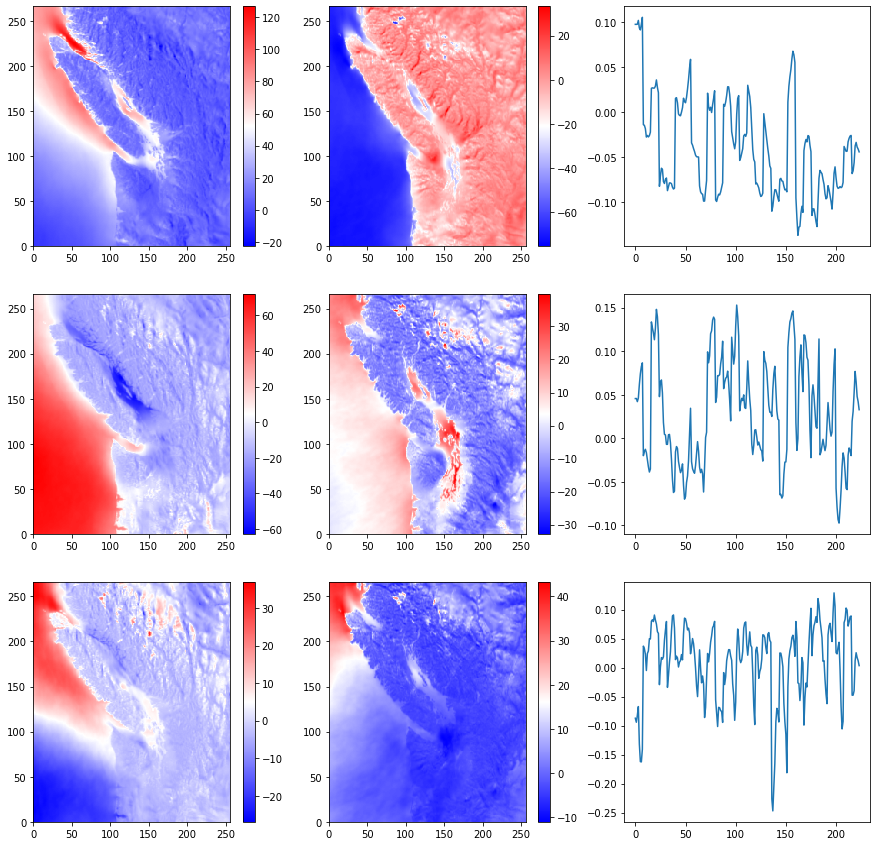

In [81]:
#displaying first 3 principle conponents (showing u_winds) and time-loading
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
mode0_u3 = PCs3[:256*266, 0].reshape(266,256)
mode1_u3 = PCs3[:256*266, 1].reshape(266,256)
mode2_u3 = PCs3[:256*266, 2].reshape(266,256)
mode0_v3 = PCs3[256*266:, 0].reshape(266,256)
mode1_v3 = PCs3[256*266:, 1].reshape(266,256)
mode2_v3 = PCs3[256*266:, 2].reshape(266,256)
colors = ax[0, 0].pcolormesh(mode0_u3, cmap = 'bwr')
fig.colorbar(colors, ax = ax[0,0])
colors = ax[0, 1].pcolormesh(mode0_v3, cmap = 'bwr')
fig.colorbar(colors, ax = ax[0,1])
ax[0, 2].plot(eigvecs3[0])
colors = ax[1, 0].pcolormesh(mode1_u3, cmap = 'bwr')
fig.colorbar(colors, ax = ax[1,0])
colors = ax[1, 1].pcolormesh(mode1_v3, cmap = 'bwr')
fig.colorbar(colors, ax = ax[1,1])
ax[1, 2].plot(eigvecs3[1])
colors = ax[2, 0].pcolormesh(mode2_u3, cmap = 'bwr')
fig.colorbar(colors, ax = ax[2,0])
colors = ax[2, 1].pcolormesh(mode2_v3, cmap = 'bwr')
fig.colorbar(colors, ax = ax[2,1])
ax[2, 2].plot(eigvecs3[2])

## Misc 

In [104]:
i, j = gt.find_closest_model_point(-123.72, 49.34, 'GEM2.5') ## Halibut bank

The number is 3 .


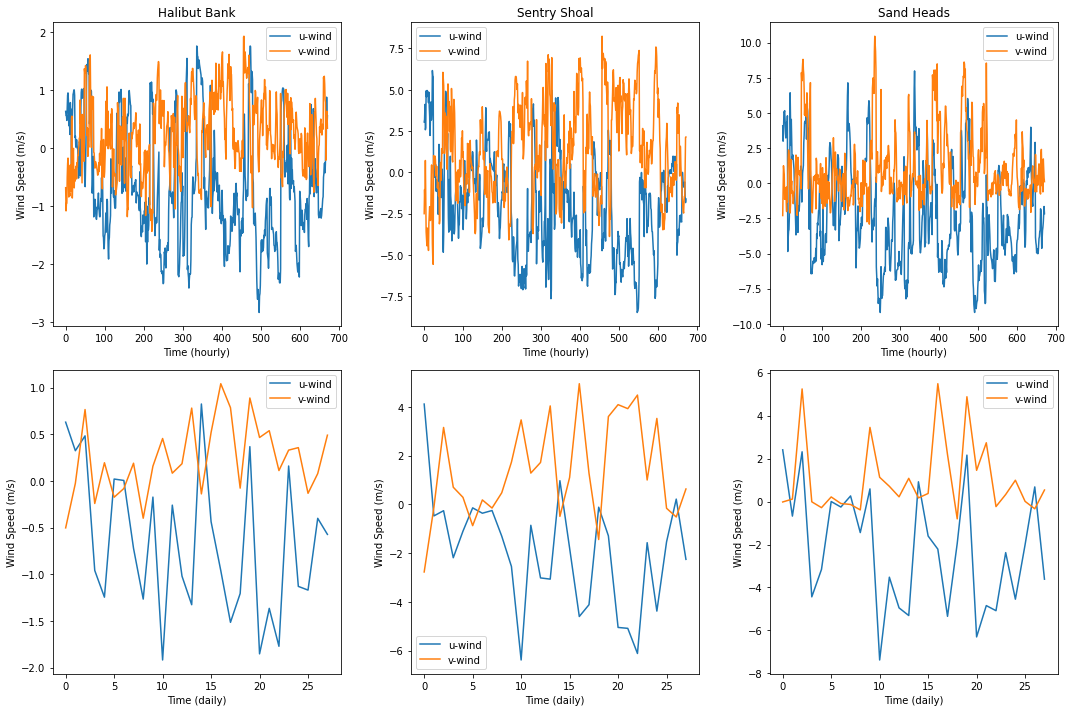

In [131]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

ax[0,0].plot(u_data[:,149,141], label = "u-wind")
ax[0,0].plot(v_data[:,149,141], label = "v-wind")
ax[0,0].set_title("Halibut Bank")
ax[0,0].set_xlabel("Time (hourly)")
ax[0,0].set_ylabel("Wind Speed (m/s)")
ax[0,0].legend()

ax[0,1].plot(u_data[:,183,107], label = "u-wind")
ax[0,1].plot(v_data[:,183,107], label = "v-wind")
ax[0,1].set_title("Sentry Shoal")
ax[0,1].set_xlabel("Time (hourly)")
ax[0,1].set_ylabel("Wind Speed (m/s)")
ax[0,1].legend()

ax[0,2].plot(u_data[:,135,151], label = "u-wind")
ax[0,2].plot(v_data[:,135,151], label = "v-wind")
ax[0,2].set_title("Sand Heads")
ax[0,2].set_xlabel("Time (hourly)")
ax[0,2].set_ylabel("Wind Speed (m/s)")
ax[0,2].legend()

ax[1,0].plot(u_data2[:,149,141], label = "u-wind")
ax[1,0].plot(v_data2[:,149,141], label = "v-wind")
ax[1,0].set_xlabel("Time (daily)")
ax[1,0].set_ylabel("Wind Speed (m/s)")
ax[1,0].legend()

ax[1,1].plot(u_data2[:,183,107], label = "u-wind")
ax[1,1].plot(v_data2[:,183,107], label = "v-wind")
ax[1,1].set_xlabel("Time (daily)")
ax[1,1].set_ylabel("Wind Speed (m/s)")
ax[1,1].legend()

ax[1,2].plot(u_data2[:,135,151], label = "u-wind")
ax[1,2].plot(v_data2[:,135,151], label = "v-wind")
ax[1,2].set_xlabel("Time (daily)")
ax[1,2].set_ylabel("Wind Speed (m/s)")
ax[1,2].legend()

plt.tight_layout()

## Comparing Principle Conponents

In [68]:
print(np.mean( np.absolute(mode0_u - mode0_u2) ))
print(np.mean( np.absolute(mode1_u - mode1_u2) ))
print(np.mean( np.absolute(mode2_u - mode2_u2) ))

30.93275836582858
35.36344191134529
8.24858848326437


Text(0.5, 1.0, 'Hourly vs 3-Hourly')

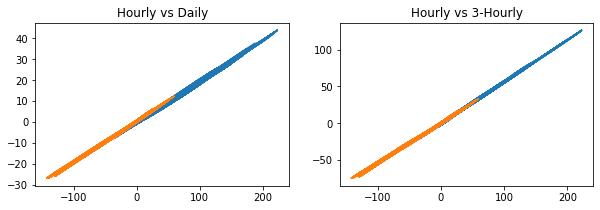

In [143]:
fig, ax = plt.subplots(1, 2, figsize = (10, 3))
ax[0].plot(mode0_u.flatten(), mode0_u2.flatten());
ax[0].plot(mode0_v.flatten(), mode0_v2.flatten());
ax[0].set_title("Hourly vs Daily")

ax[1].plot(mode0_u.flatten(), mode0_u3.flatten());
ax[1].plot(mode0_v.flatten(), mode0_v3.flatten());
ax[1].set_title("Hourly vs 3-Hourly")

Text(0.5, 1.0, 'Hourly vs 3-Hourly')

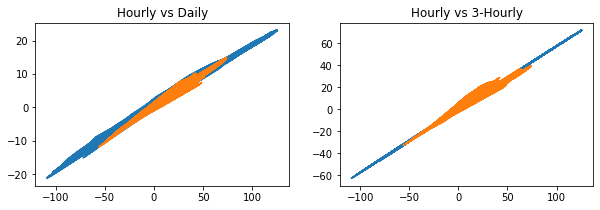

In [144]:
fig, ax = plt.subplots(1, 2, figsize = (10, 3))
ax[0].plot(mode1_u.flatten(), mode1_u2.flatten());
ax[0].plot(mode1_v.flatten(), mode1_v2.flatten());
ax[0].set_title("Hourly vs Daily")

ax[1].plot(mode1_u.flatten(), mode1_u3.flatten());
ax[1].plot(mode1_v.flatten(), mode1_v3.flatten());
ax[1].set_title("Hourly vs 3-Hourly")

Text(0.5, 1.0, 'Hourly vs 3-Hourly')

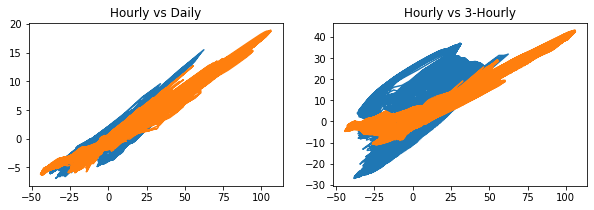

In [145]:
fig, ax = plt.subplots(1, 2, figsize = (10, 3))
ax[0].plot(mode2_u.flatten(), mode2_u2.flatten());
ax[0].plot(mode2_v.flatten(), mode2_v2.flatten());
ax[0].set_title("Hourly vs Daily")

ax[1].plot(mode2_u.flatten(), mode2_u3.flatten());
ax[1].plot(mode2_v.flatten(), mode2_v3.flatten());
ax[1].set_title("Hourly vs 3-Hourly")